<h2>Import required library</h2>

In [88]:
# import all requires library for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('Success')

Success


<h2>Load dataset from local</h2>

In [89]:
url = 'D:\#Portfolio\da-python-project\pizza-sales-eda\pizza_sales.csv'
df = pd.read_csv(url)

In [90]:
df.head(10)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
5,6.0,2.0,thai_ckn_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
6,7.0,3.0,ital_supr_m,1.0,1/1/2015,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
7,8.0,3.0,prsc_argla_l,1.0,1/1/2015,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
8,9.0,4.0,ital_supr_m,1.0,1/1/2015,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
9,10.0,5.0,ital_supr_m,1.0,1/1/2015,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


In [91]:
#  checking if any null data in the dataset
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [92]:
# checking if there is any diplicate data in the dataset
df.duplicated().sum()

0

In [93]:
# checking all the dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


<h2>Data Pre-processing</h2>

In [94]:
df_cleaned = df.copy()

In [95]:
# check length of dataset
df_cleaned.shape

(48620, 12)

In [96]:
df_cleaned.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


<h3> import regex to re factor order date

In [97]:
import re
print('Susccess')

Susccess


In [98]:
# there was an issue on column order_date. The format of date is not correct, becasuse it's contains slash (/). So, we have to replace it with stripe (-). 
df_cleaned['order_date'] =  df_cleaned['order_date'].apply(lambda x: re.sub('/','-', str(x)))

In [99]:
# convert column pizza id, order id and quantity into correct data types, from float to int. 
for col in ['pizza_id', 'order_id', 'quantity']:
    df_cleaned[col] = df_cleaned[col].round().astype('int64')
    print(df_cleaned[col].dtypes)

int64
int64
int64


In [100]:
# merge between column order date and order time into one new column called new order date
df_cleaned['new_order_date'] = df_cleaned['order_date'].astype(str) + ' ' + df_cleaned['order_time']

# define the correct format of date time
df_cleaned['new_order_date'] = pd.to_datetime(df_cleaned['new_order_date'], format="%d-%m-%Y %H:%M:%S")

# drop unuse columns which is order date and order time
df_cleaned.drop(columns={'order_date', 'order_time'}, inplace=True)

# check dataframe
df_cleaned.head()

,pizza_id,order_id,pizza_name_id,quantity,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,new_order_date
0,1,1,hawaiian_m,1,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:38:36
1,2,2,classic_dlx_m,1,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 11:57:40
2,3,2,five_cheese_l,1,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 11:57:40
3,4,2,ital_supr_l,1,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 11:57:40
4,5,2,mexicana_m,1,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01 11:57:40


In [101]:
# check data types
df_cleaned.dtypes

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
new_order_date       datetime64[ns]
dtype: object

In [102]:
# check whether there is duplicates column
df_cleaned.duplicated().sum()

0

In [103]:
# do quick numerical count for analysis
df_cleaned.describe()

,pizza_id,order_id,quantity,unit_price,total_price,new_order_date
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474,2015-06-30 03:28:34.933833984
min,1.000000,1.000000,1.000000,9.750000,9.750000,2015-01-01 11:38:36
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000,2015-03-31 15:34:31
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000,2015-06-28 19:50:30
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000,2015-09-28 18:39:55
max,48620.000000,21350.000000,4.000000,35.950000,83.000000,2015-12-31 23:02:05
std,14035.529381,6180.119770,0.143077,3.621789,4.437398,NaN


<h3>Show the spread of datas on each columns using pairplot vizualisation</h3>

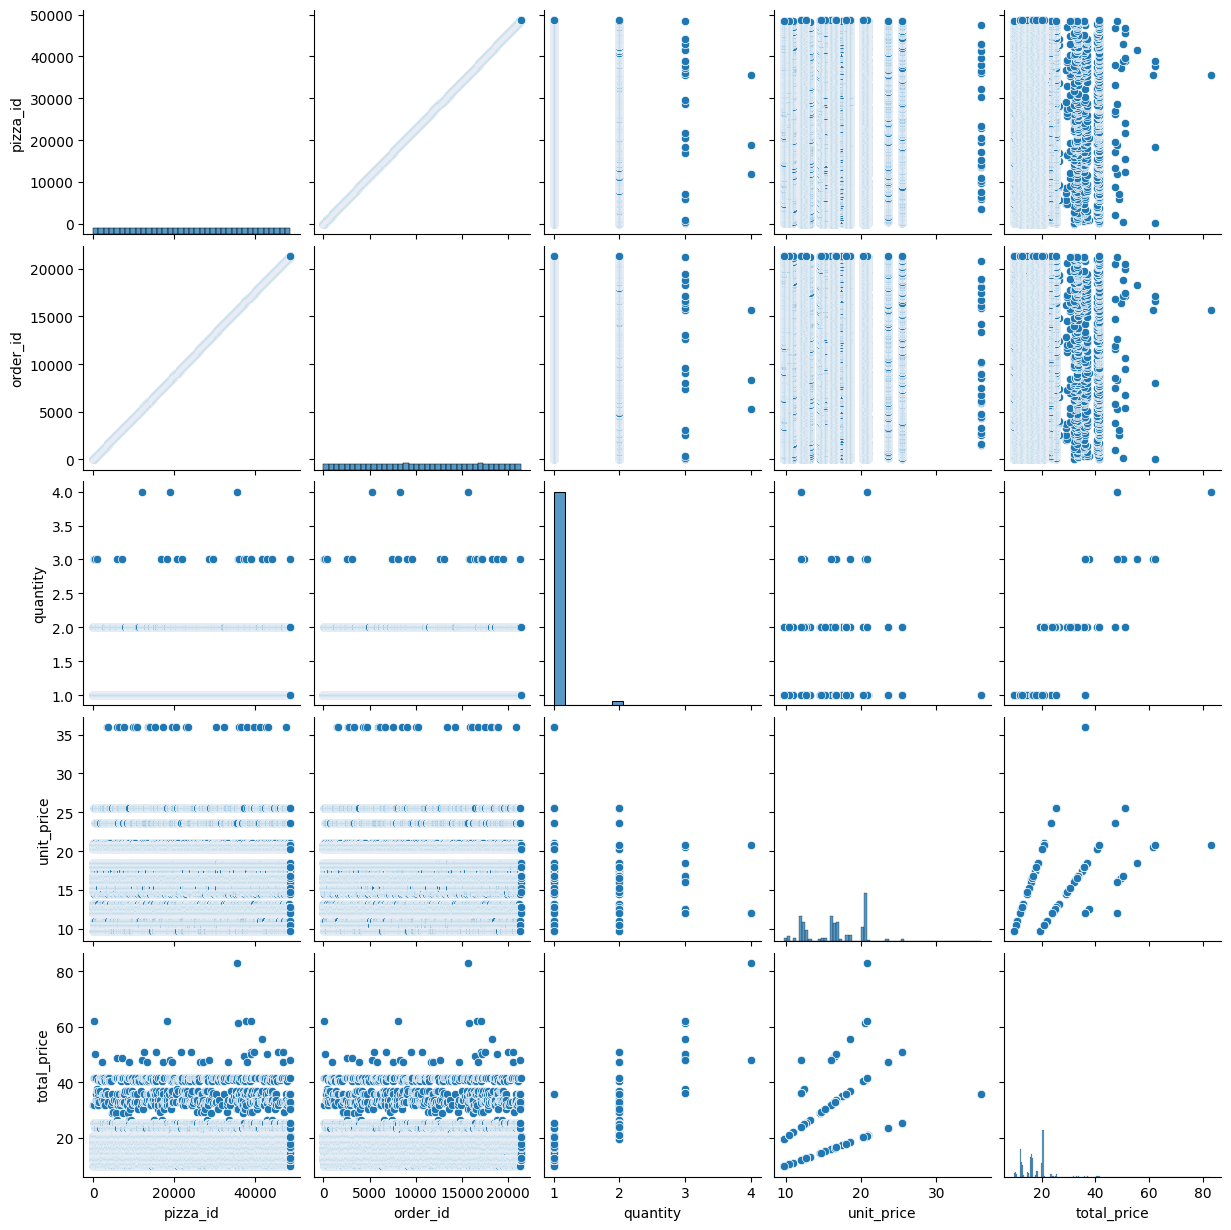

In [104]:
# checking outliers
pairplot = sns.pairplot(df_cleaned)
plt.show()

<h3>Check whether there is an outliers or not using boxplot visualization</h3>

pizza_id          Axes(0.125,0.653529;0.227941x0.226471)
order_id       Axes(0.398529,0.653529;0.227941x0.226471)
quantity       Axes(0.672059,0.653529;0.227941x0.226471)
unit_price        Axes(0.125,0.381765;0.227941x0.226471)
total_price    Axes(0.398529,0.381765;0.227941x0.226471)
dtype: object

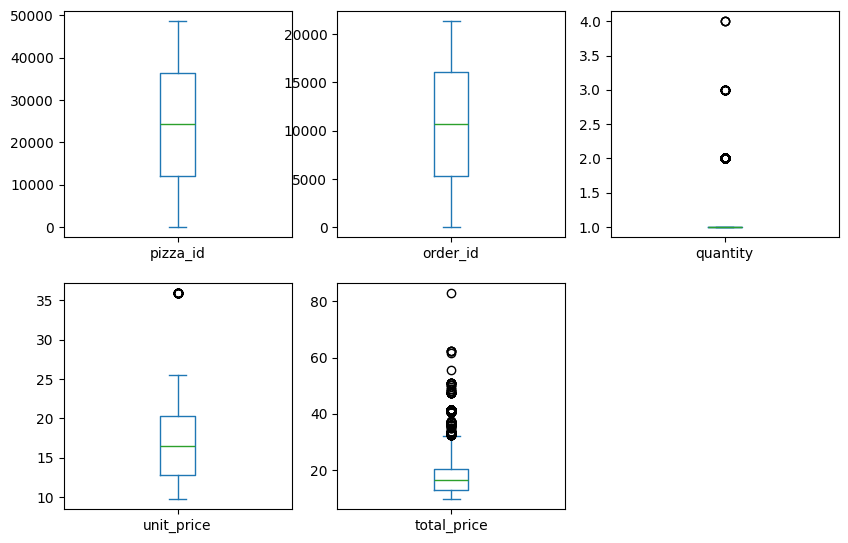

In [105]:
# checking outliers
df_cleaned.plot(kind='box', subplots=True, layout=(3,3), figsize=(10,10))

<h3>Removing outliers using IQR method</h3>

In [106]:
# removing outliers on columns quantity, unit price and total price using IQR method
print(f'Rows before outliers filtered: {len(df_cleaned)}')

for col in ['quantity','unit_price', 'total_price']:
  Q1 = df_cleaned[col].quantile(0.25)
  Q3 = df_cleaned[col].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  df_cleaned = df_cleaned[(df_cleaned[col] >= low_limit) & (df_cleaned[col] <= high_limit)]

print(f'Rows after outliers filtered: {len(df_cleaned)}')

Rows before outliers filtered: 48620
Rows after outliers filtered: 47665


pizza_id          Axes(0.125,0.653529;0.227941x0.226471)
order_id       Axes(0.398529,0.653529;0.227941x0.226471)
quantity       Axes(0.672059,0.653529;0.227941x0.226471)
unit_price        Axes(0.125,0.381765;0.227941x0.226471)
total_price    Axes(0.398529,0.381765;0.227941x0.226471)
dtype: object

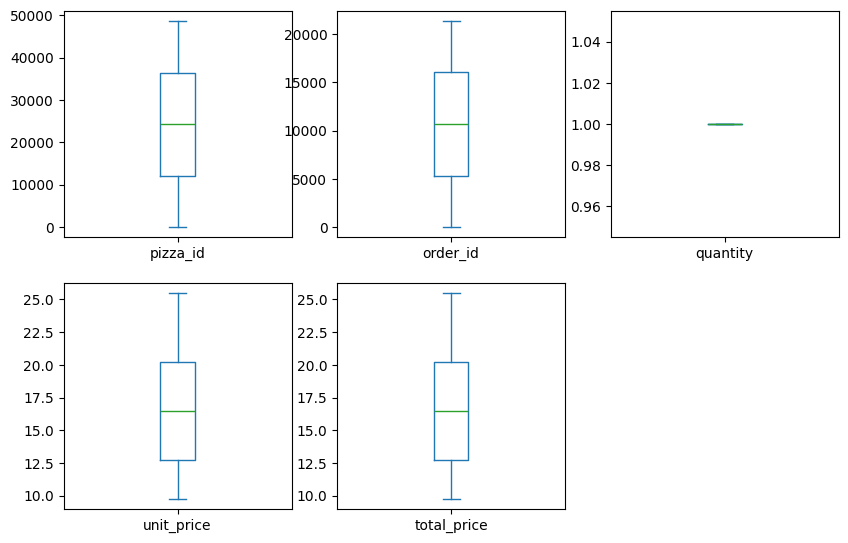

In [107]:
# re-checking outliers
df_cleaned.plot(kind='box', subplots=True, layout=(3,3), figsize=(10,10))

In [108]:
# define font dictionary for vizualisation uses
font = {'family': 'georgia',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

<h3>Define new columns from order date</h3>

In [109]:
# define new three columns: day name, month, and month name 
df_cleaned['day_name'] = df_cleaned['new_order_date'].dt.day_name()
df_cleaned['month'] = df_cleaned['new_order_date'].dt.month
df_cleaned['month_name'] = df_cleaned['new_order_date'].dt.month_name()

In [130]:
# define new variable to collect all numerical columns in dataset
num_cols = df_cleaned.select_dtypes('int64', 'float64').columns

# define new variable to collect all categorical columns in dataset
cat_cols = df_cleaned.select_dtypes('object',('datetime64[ns]')).columns

# shows the results
print(f'There are totals {len(num_cols)} numerical columns in dataset')
print(num_cols,'\n')
print(f'There are totals {len(cat_cols)} categorical columns in dataset')
print(cat_cols)

There are totals 3 numerical columns in dataset
Index(['pizza_id', 'order_id', 'quantity'], dtype='object') 

There are totals 7 categorical columns in dataset
Index(['pizza_name_id', 'pizza_size', 'pizza_category', 'pizza_ingredients',
       'pizza_name', 'day_name', 'month_name'],
      dtype='object')


In [111]:
# check typo and show all values of categorical columns in dataset
for col in cat_cols:
    print(df_cleaned[col].value_counts(),'\n')

pizza_name_id
big_meat_s        1716
thai_ckn_l        1321
five_cheese_l     1310
four_cheese_l     1230
classic_dlx_m     1139
                  ... 
ckn_alfredo_l      186
mexicana_s         158
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      93
Name: count, Length: 90, dtype: int64 

pizza_size
L     18105
M     15143
S     13881
XL      536
Name: count, dtype: int64 

pizza_category
Classic    14256
Supreme    11572
Veggie     11250
Chicken    10587
Name: count, dtype: int64 

pizza_ingredients
Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon                                                 2382
Mozzarella Cheese, Pepperoni                                                                         2321
Sliced Ham, Pineapple, Mozzarella Cheese                                                             2319
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  2316
Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet

<h1>EDA</h1>

<h3>Do quick analysis on numerical and categorical columns with describe()</h3>

In [112]:
# define new variable to collect all numerical columns in dataset
num_cols = df_cleaned.select_dtypes('int64', 'float64').columns

# define new variable to collect all categorical columns in dataset
cat_cols = df_cleaned.select_dtypes('object').columns

print(df_cleaned[cat_cols].describe(),'\n')
print('\n',df_cleaned[num_cols].describe())

       pizza_name_id pizza_size pizza_category  \
count          47665      47665          47665   
unique            90          4              4   
top       big_meat_s          L        Classic   
freq            1716      18105          14256   

                                        pizza_ingredients  \
count                                               47665   
unique                                                 32   
top     Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
freq                                                 2382   

                      pizza_name day_name month_name  
count                      47665    47665      47665  
unique                        32        7         12  
top     The Classic Deluxe Pizza   Friday       July  
freq                        2382     7973       4211   


            pizza_id      order_id  quantity
count  47665.000000  47665.000000   47665.0
mean   24304.470240  10698.843722       1.0
std    14037.484995   6180.98156

In [113]:
# check all value year in new order date
print((df_cleaned['new_order_date'].dt.year.value_counts()))

new_order_date
2015    47665
Name: count, dtype: int64


In [114]:
df_cleaned.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'unit_price',
       'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients',
       'pizza_name', 'new_order_date', 'day_name', 'month', 'month_name'],
      dtype='object')

In [115]:
# define new index month to re-arrange month in vizualisation later
new_index_months = ['January', 'February', 
                    'March', 'April',
                    'May', 'June', 
                    'July', 'August', 
                    'September','October', 
                    'November', 'December']

In [116]:
# define new index day to re-arrange days of week in vizualisation later
index_day = (['Sunday','Monday',
              'Tuesday','Wednesday',
              'Thursday','Friday',
              'Saturday'])

<h3>Revenue trend per month</h3>

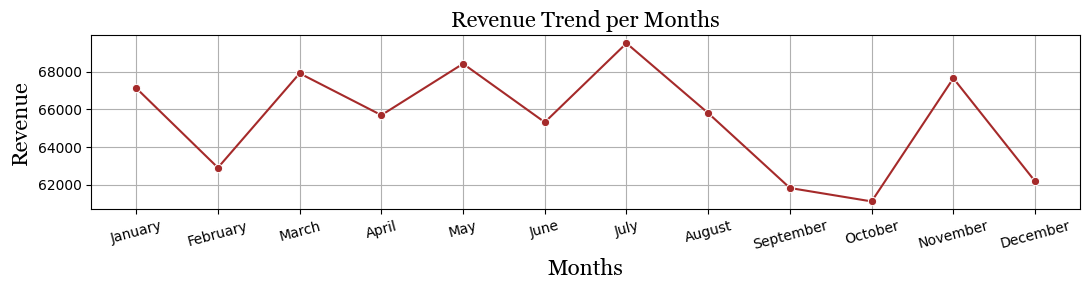

In [117]:
# make revenue group by month name with aggregate sum on column total price
rev_per_month = df_cleaned.groupby('month_name')['total_price'].sum()

# re-arrange month name index with applying mapping index month
rev_per_month = rev_per_month.reindex(new_index_months).reset_index()

rev_per_month

# define plot vizualisation with sns line plot
plt.figure(figsize=(11,3)) # define the size of figure
sns.lineplot(data=rev_per_month, x='month_name', y='total_price',
             marker='o', linestyle='-', color='brown') # define line plot
plt.xticks(rotation=15) # rotate x value
plt.xlabel('Months', fontdict=font) # define x label
plt.ylabel('Revenue', fontdict=font)# define y label
plt.title('Revenue Trend per Months', fontdict=font) # define title 
plt.grid(True) # show the grid

plt.tight_layout()
plt.show()

<h3>Revenue trend by days per month</h3>

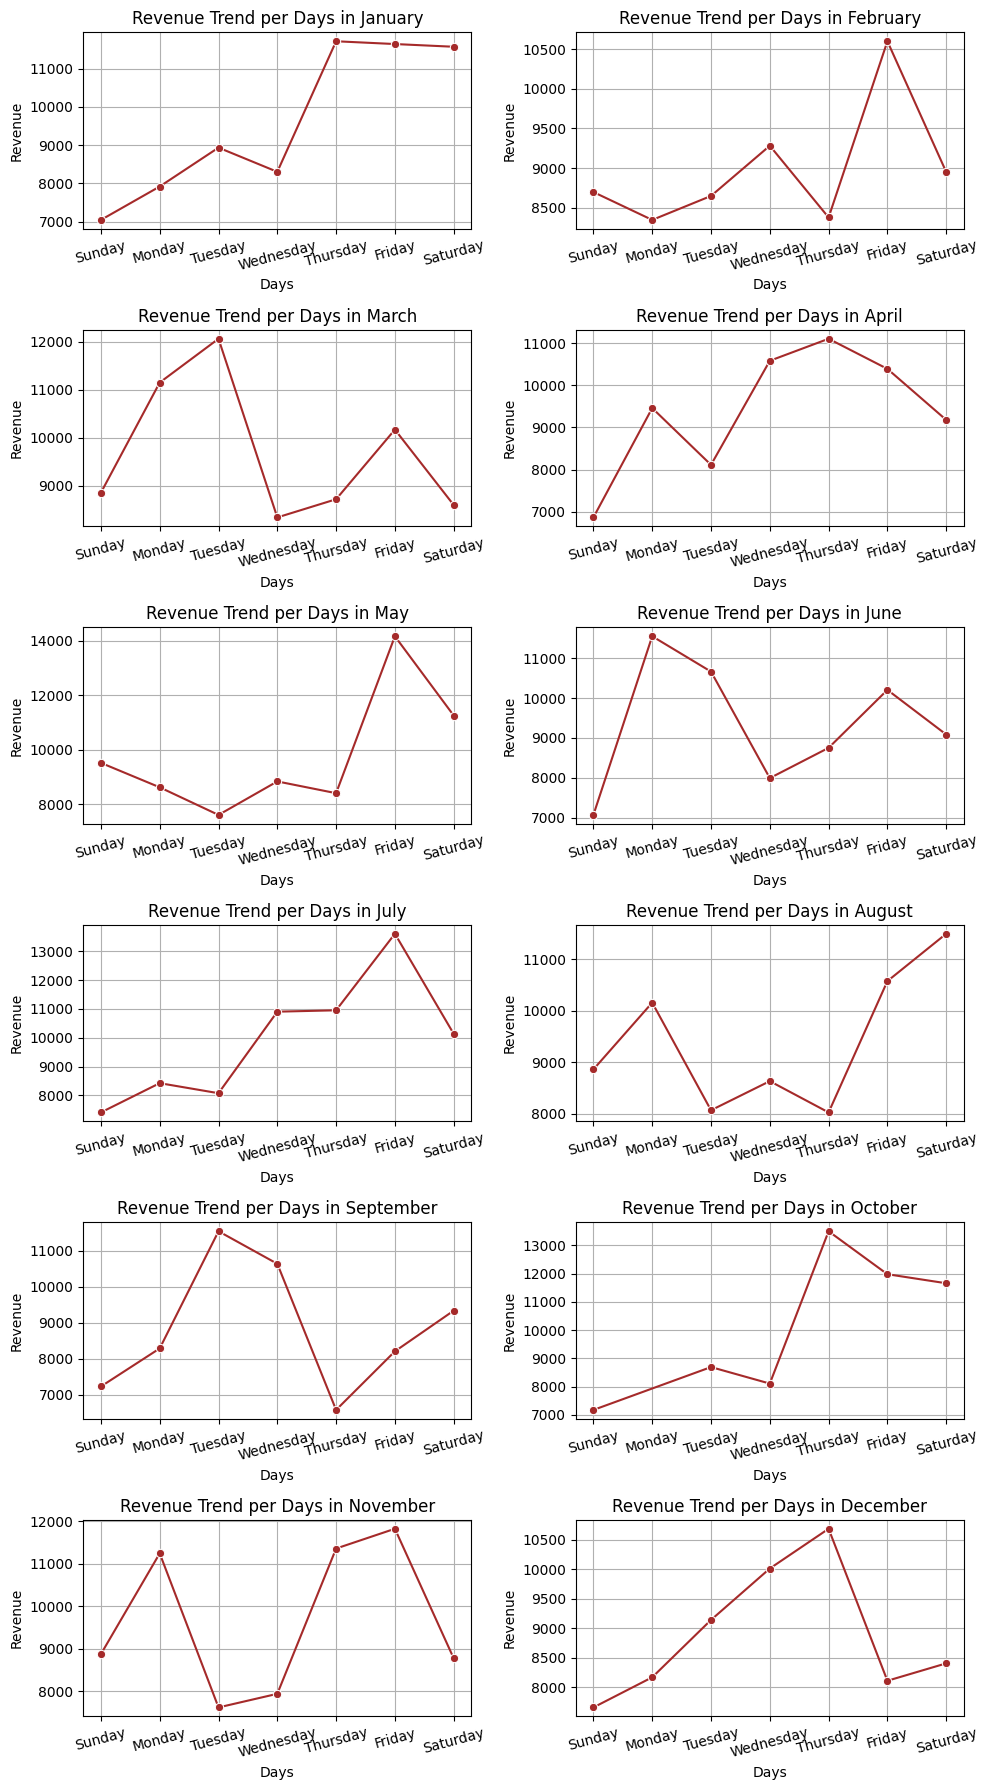

In [118]:

# Define the unique months
unique_months = df_cleaned['month_name'].unique()

# Calculate the number of rows and columns needed
num_plots = len(unique_months)
num_cols = 2
num_rows = (num_plots + 1) // num_cols  # Ensure an extra row if the number of 
                                        # plots is not evenly divisible by num_cols

# Define the figure size based on the number of rows and columns
fig_width = 10  # Adjust as needed
fig_height = 3 * num_rows  # Adjust as needed

# Create the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Calculate revenue per day for each month and plot
for idx, month in enumerate(unique_months):
    # Calculate revenue per day for the current month
    rev_per_day = df_cleaned[df_cleaned['month_name'] == month].groupby('day_name')\
                                                                ['total_price'].sum()
    rev_per_day = rev_per_day.reindex(index_day).reset_index()
    
    # Plot on the respective axes
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    
    sns.lineplot(data=rev_per_day, x='day_name', y='total_price', ax=axes[row_idx, col_idx], 
                 marker='o', linestyle='-', color='brown')
    axes[row_idx, col_idx].set_title(f'Revenue Trend per Days in {month}')
    axes[row_idx, col_idx].tick_params(axis='x', rotation=15)  # Rotate x-axis labels
    axes[row_idx, col_idx].grid(True)

    # Set x and y labels
    axes[row_idx, col_idx].set_xlabel('Days')
    axes[row_idx, col_idx].set_ylabel('Revenue')
    
# Remove any empty subplots
for idx in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

<h3>Top 5 pizzas Bottom 5 pizzas</h3>

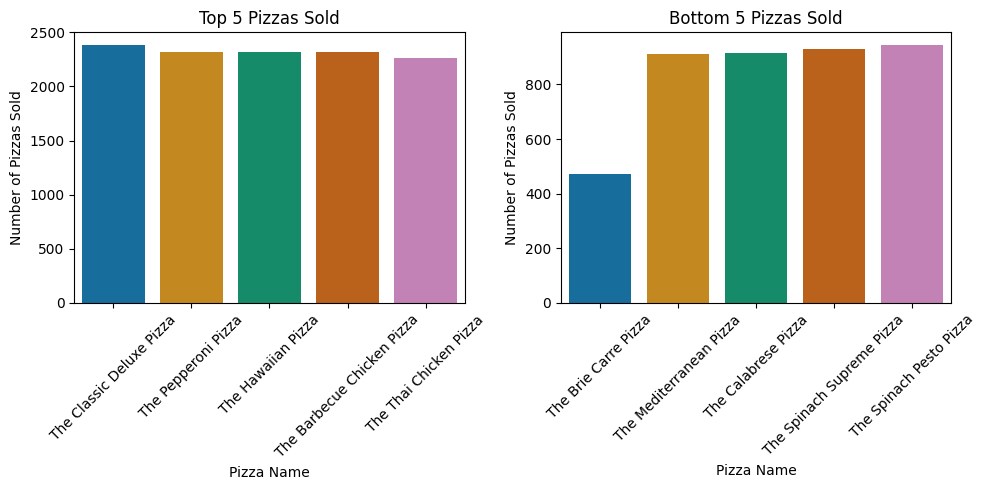

In [119]:
# make top 5 pizzas sold group by pizza name and aggeregate count
top5_pizzas_sold = df_cleaned.groupby(by='pizza_name')['pizza_name']\
                                 .count()\
                                 .sort_values(ascending=False)\
                                 .head()
                                 
# make bottom 5 pizzas sold group by pizza name and aggeregate count
bot5_pizzas_sold = df_cleaned.groupby(by='pizza_name')['pizza_name']\
                                    .value_counts()\
                                    .sort_values(ascending=True)\
                                    .head()

# Create a figure and two subplots (one for top 5 and one for bottom 5)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot top 5 pizzas sold
sns.barplot(data=top5_pizzas_sold.reset_index(name='pizza_sold'),
            x='pizza_name', y='pizza_sold', ax=axes[0], palette='colorblind')
axes[0].set_title('Top 5 Pizzas Sold')
axes[0].set_xlabel('Pizza Name')
axes[0].set_ylabel('Number of Pizzas Sold')
axes[0].tick_params(axis='x', rotation=45)

# Plot bottom 5 pizzas sold
sns.barplot(data=bot5_pizzas_sold.reset_index(name='pizza_sold'),
            x='pizza_name', y='pizza_sold', ax=axes[1], palette='colorblind')
axes[1].set_title('Bottom 5 Pizzas Sold')
axes[1].set_xlabel('Pizza Name')
axes[1].set_ylabel('Number of Pizzas Sold')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<h3>Pizza sold by size and category</h3>

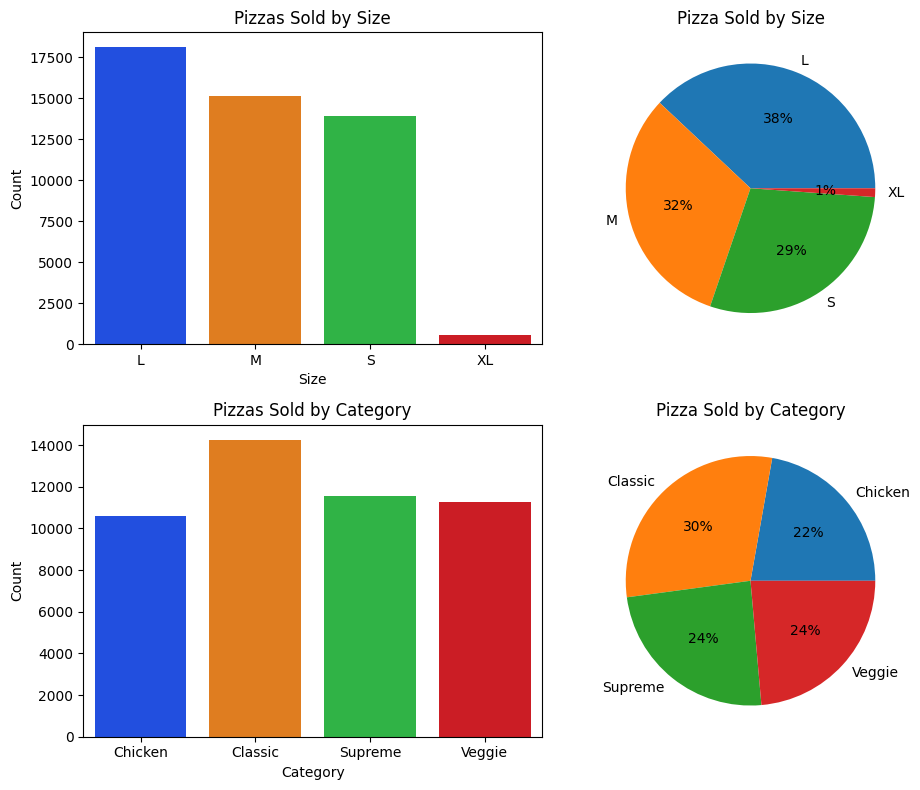

In [120]:
# create count pizzas sold by size 
pizzas_sold_size = df_cleaned.groupby(by=['pizza_size']).size().reset_index(name='count')

# create count pizzas sold by category
pizzas_sold_cat = df_cleaned.groupby(by=['pizza_category']).size().reset_index(name='count')

fig, axes = plt.subplots(2,2,figsize=(10,8))

# plot the pizzas sold by size into seaborn bar plot
sns.barplot(data=pizzas_sold_size, x='pizza_size', y='count', ax=axes[0,0], palette='bright')
axes[0,0].set_title('Pizzas Sold by Size')
axes[0,0].set_xlabel('Size')
axes[0,0].set_ylabel('Count')

# plot the pizzas sold by size into pie plot
axes[0,1].pie(pizzas_sold_size['count'], labels=pizzas_sold_size['pizza_size'], autopct='%.0f%%')
axes[0,1].set_title('Pizza Sold by Size')

# plot the pizzas sold by category into bar plot
sns.barplot(data=pizzas_sold_cat, x='pizza_category', y='count', ax=axes[1,0], palette='bright')
axes[1,0].set_title('Pizzas Sold by Category')
axes[1,0].set_xlabel('Category')
axes[1,0].set_ylabel('Count')

# plot the pizzas sold by category into pie plot
axes[1,1].pie(pizzas_sold_cat['count'], labels=pizzas_sold_cat['pizza_category'], autopct='%.0f%%')
axes[1,1].set_title('Pizza Sold by Category')
# fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

<h3>Pizza sold by size and cat per month</h3>

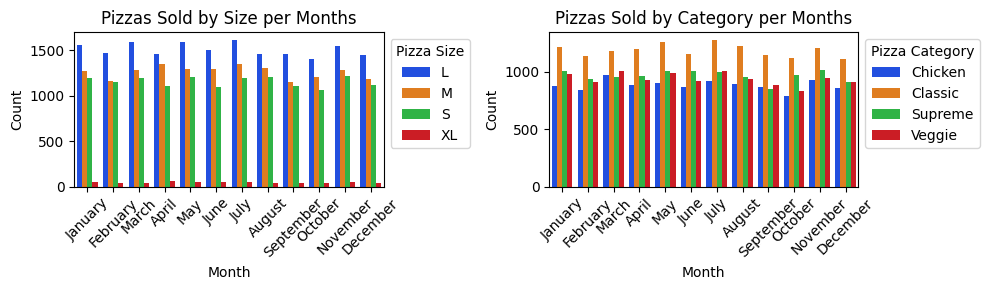

In [121]:
# create pizzas sold by size per month
month_sold_by_size = df_cleaned.groupby(['month_name','pizza_size']).size().reset_index(name='count')
month_sold_by_size

# create pizzas sold by category per month
month_sold_by_cat = df_cleaned.groupby(['month_name','pizza_category']).size().reset_index(name='count')
month_sold_by_cat

fig, axes = plt.subplots(1,2,figsize=(10,3))

# plot pizzas sold by size per month into seaborn bar plot
sns.barplot(data=month_sold_by_size, x='month_name', y='count', hue='pizza_size', ax=axes[0], palette='bright', order=new_index_months)
axes[0].set_title('Pizzas Sold by Size per Months')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Pizza Size', loc='best', bbox_to_anchor=(1, 1))

# plot pizzas sold by category per month into seaborn bar plot
sns.barplot(data=month_sold_by_cat, x='month_name', y='count', hue='pizza_category', ax=axes[1], palette='bright', order=new_index_months)
axes[1].set_title('Pizzas Sold by Category per Months')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Pizza Category', loc='best', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

<h3>Pizza sold by size and cat by days</h3>

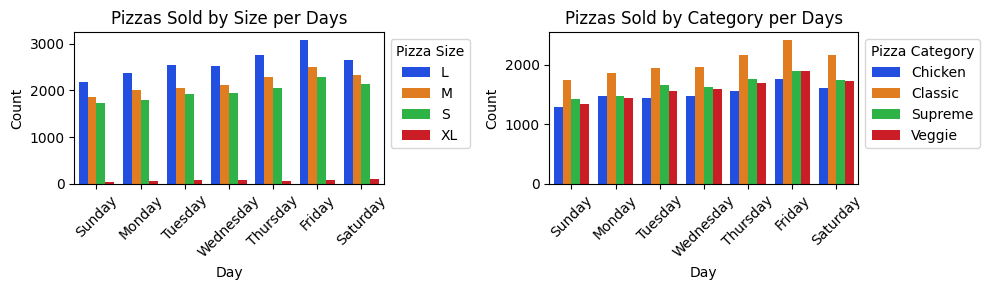

In [122]:
# create pizzas sold per day by size
day_sold_by_size = df_cleaned.groupby(['day_name','pizza_size']).size().reset_index(name='count')
day_sold_by_size

# create pizzas sold per day by category
day_sold_by_cat = df_cleaned.groupby(['day_name','pizza_category']).size().reset_index(name='count')
day_sold_by_cat

fig, axes = plt.subplots(1,2,figsize=(10,3))

# plot pizzas sold by size per day into seaborn bar plot
sns.barplot(data=day_sold_by_size, x='day_name', y='count', hue='pizza_size', ax=axes[0], palette='bright', order=index_day)
axes[0].set_title('Pizzas Sold by Size per Days')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Pizza Size', loc='best', bbox_to_anchor=(1, 1))

# plot pizzas sold by category per day into seaborn bar plot
sns.barplot(data=day_sold_by_cat, x='day_name', y='count', hue='pizza_category', ax=axes[1], palette='bright', order=index_day)
axes[1].set_title('Pizzas Sold by Category per Days')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Pizza Category', loc='best', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

<h3>Pizza Category by Size ~ Pizza Size by Category</h3>

In [123]:
pizzas_category_by_size = df_cleaned.groupby(by=['pizza_size','pizza_category']).size().groupby(level=0).nlargest(5).reset_index(level=0, drop=True)
# pizzas_sales_by_category = pd.DataFrame(pizzas_sales_by_category)
pizzas_category_by_size = pd.DataFrame(pizzas_category_by_size.reset_index(name='count'))
# pizzas_category_by_size

pizzas_size_by_category = df_cleaned.groupby(by=['pizza_category','pizza_size']).size().groupby(level=0).nlargest(5).reset_index(level=0, drop=True)
# pizzas_sales_by_category = pd.DataFrame(pizzas_sales_by_category)
pizzas_size_by_category = pd.DataFrame(pizzas_size_by_category.reset_index(name='count'))
# pizzas_size_by_category

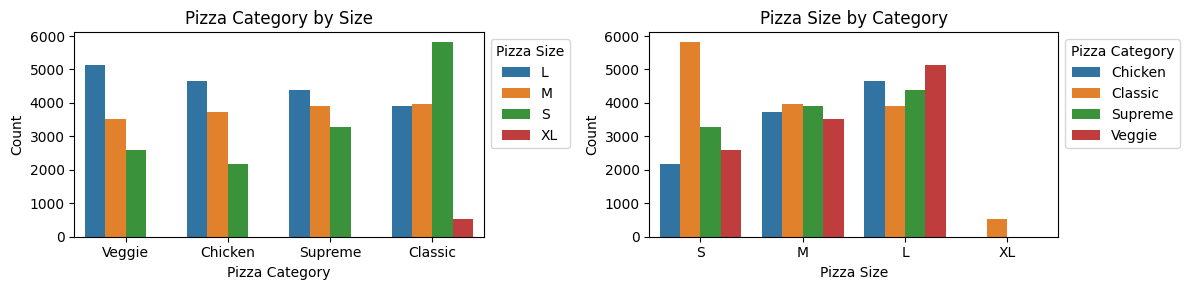

In [124]:
fig, axes = plt.subplots(1,2,figsize=(12,3))

# sns.set(font_scale=1.2, style='whitegrid', font=font)

sns.barplot(data=pizzas_category_by_size, x='pizza_category', y='count',ax=axes[0], hue='pizza_size')
# plt.xticks(rotation=45)
axes[0].set_xlabel('Pizza Category')
axes[0].set_ylabel('Count')
axes[0].set_title('Pizza Category by Size')
axes[0].legend(title='Pizza Size', loc='best', bbox_to_anchor=(1, 1))

index_size = ['S','M','L','XL']

sns.barplot(data=pizzas_size_by_category, x='pizza_size', y='count', hue='pizza_category',ax=axes[1], order=index_size)
# plt.xticks(rotation=45)
axes[1].set_xlabel('Pizza Size')
axes[1].set_ylabel('Count')
axes[1].set_title('Pizza Size by Category')
axes[1].legend(title='Pizza Category', loc='best', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

<h3>Extract completed and cleaned dataset to current folder for making a dashboard later</h3>

In [125]:
# df_cleaned.to_csv('pizza_sales_done.csv', index=False)

<h3>Do encoding on the dataset</h3>

In [126]:
df_encoding = df_cleaned.copy()

In [128]:
# import required library
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [133]:
# do for looping to encode the numerical columns in the dataset
for col in cat_cols:
    df_encoding[col] = encode.fit_transform(df_encoding[col].values)
    
# df_encoding.head()

In [134]:
df_encoding.head()

,pizza_id,order_id,pizza_name_id,quantity,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,new_order_date,day_name,month,month_name
0,0,0,27,0,13.25,13.25,1,1,23,12,2015-01-01 11:38:36,4,1,4
1,1,1,18,0,16.00,16.00,1,1,20,7,2015-01-01 11:57:40,4,1,4
2,2,1,20,0,18.50,18.50,0,3,17,8,2015-01-01 11:57:40,4,1,4
3,3,1,32,0,20.75,20.75,0,2,4,14,2015-01-01 11:57:40,4,1,4
4,4,1,42,0,16.00,16.00,1,3,31,17,2015-01-01 11:57:40,4,1,4


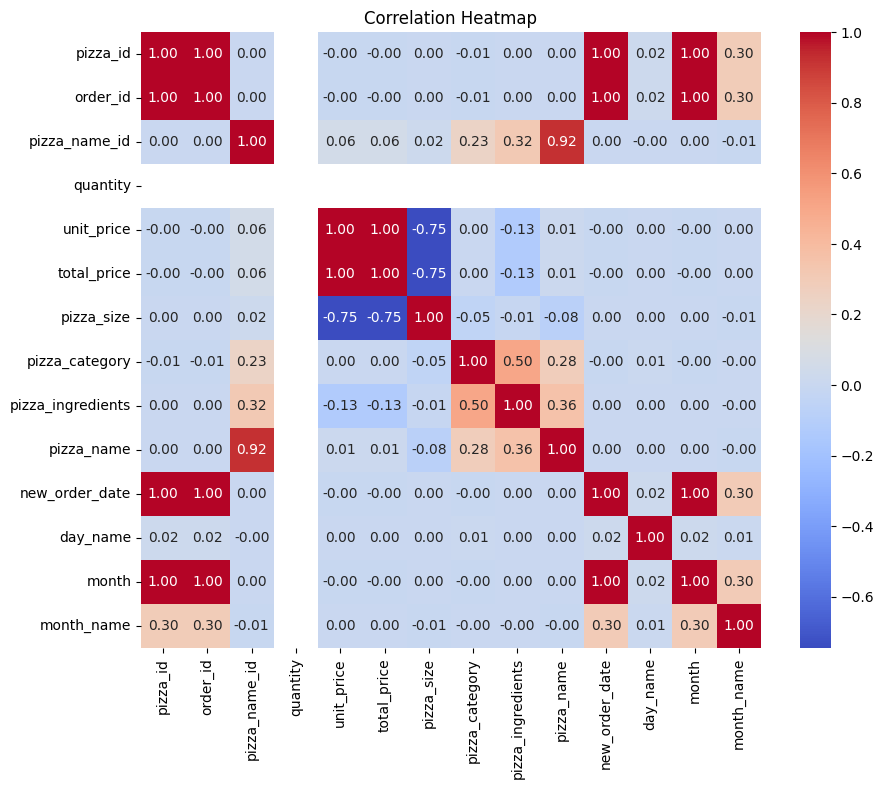

In [135]:
corr_matrix = df_encoding.corr()

plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()